In [38]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz

In [39]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Considere el proyecto cuya información se adjunta. Realice cada apartado partiendo en todos los casos de la situación original del proyecto indicada en los datos del enunciado.

In [40]:
pregunta_1 = "1. Dibuje el grafo PERT y determine el camino crítico.  "
pregunta_2 = "2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  "
pregunta_3 = "3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  "
pregunta_4 = "4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  "
pregunta_5 = """5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución"""

In [41]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))

1. Dibuje el grafo PERT y determine el camino crítico.  

2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  

3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  

4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  

5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución

In [42]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, cur, recursos
     ('A',       '---  ',     4,         1,          25,     2    ),
     ('B',       'A    ',     4,         1,          25,     1    ),
     ('C',       'A    ',     5,         2,          20,     2    ),
     ('D',       'A    ',     4,         1,          10,     2    ),
     ('E',       'A    ',     3,         2,          50,     2    ),
     ('F',       'D,E  ',     6,         3,          30,     4    ),
     ('G',       'F    ',     4,         1,          25,     1    ),
     ('H',       'B,C,G',     7,         4,          20,     1    ),
     ('I',       'C,G  ',     5,         2,          20,     3    ),
     ('J',       'I    ',     4,         1,          25,     4    ),
     ('K',       'F    ',     4,         1,          25,     1    ),
     ('L',       'H    ',     8,         5,          10,     2    ),
     ('M',       'I,K  ',     4,         1,          25,     1    ),

] ,columns=['activity', 'predecessor', 'duration', 'cap_duration', 'ucr', 'resources']).set_index('activity')

datos_enunciado

,predecessor,duration,cap_duration,ucr,resources
activity,,,,,
A,---,4,1,25,2
B,A,4,1,25,1
C,A,5,2,20,2
D,A,4,1,10,2
E,A,3,2,50,2
F,"D,E",6,3,30,4
G,F,4,1,25,1
H,"B,C,G",7,4,20,1
I,"C,G",5,2,20,3


# Solución
## Apartado 1

In [43]:
display(Markdown(pregunta_1))

1. Dibuje el grafo PERT y determine el camino crítico.  

### Cuadros de prelaciones expandido

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [44]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L,M
activities,,,,,,,,,,,,,
A,,,,,,,,,,,,,
B,True,,,,,,,,,,,,
C,True,,,,,,,,,,,,
D,True,,,,,,,,,,,,
E,True,,,,,,,,,,,,
F,,,,True,True,,,,,,,,
G,,,,,,True,,,,,,,
H,,True,True,,,,True,,,,,,
I,,,True,,,,True,,,,,,


### Grafo PERT con numeración de nodos

Utilizando el cuadro de prelaciones expandido podemos dibujar el grafo Pert correspondiente al proyecto.

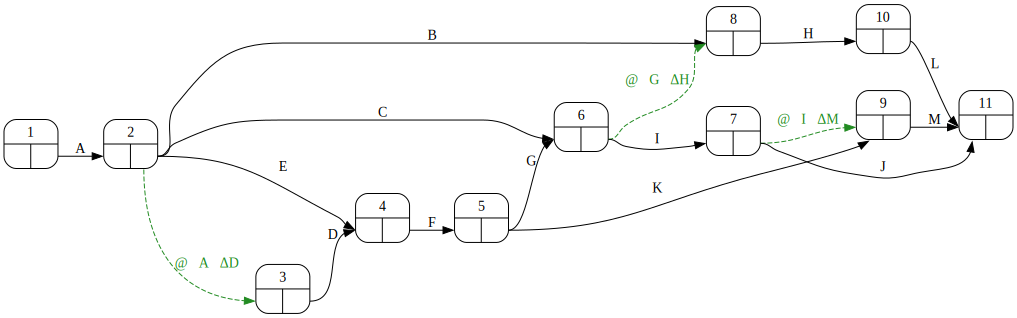

In [45]:
#| fig-cap: "Grafo Pert con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=0.5)

Alternativamente podríamos haber representado su grafo Roy.

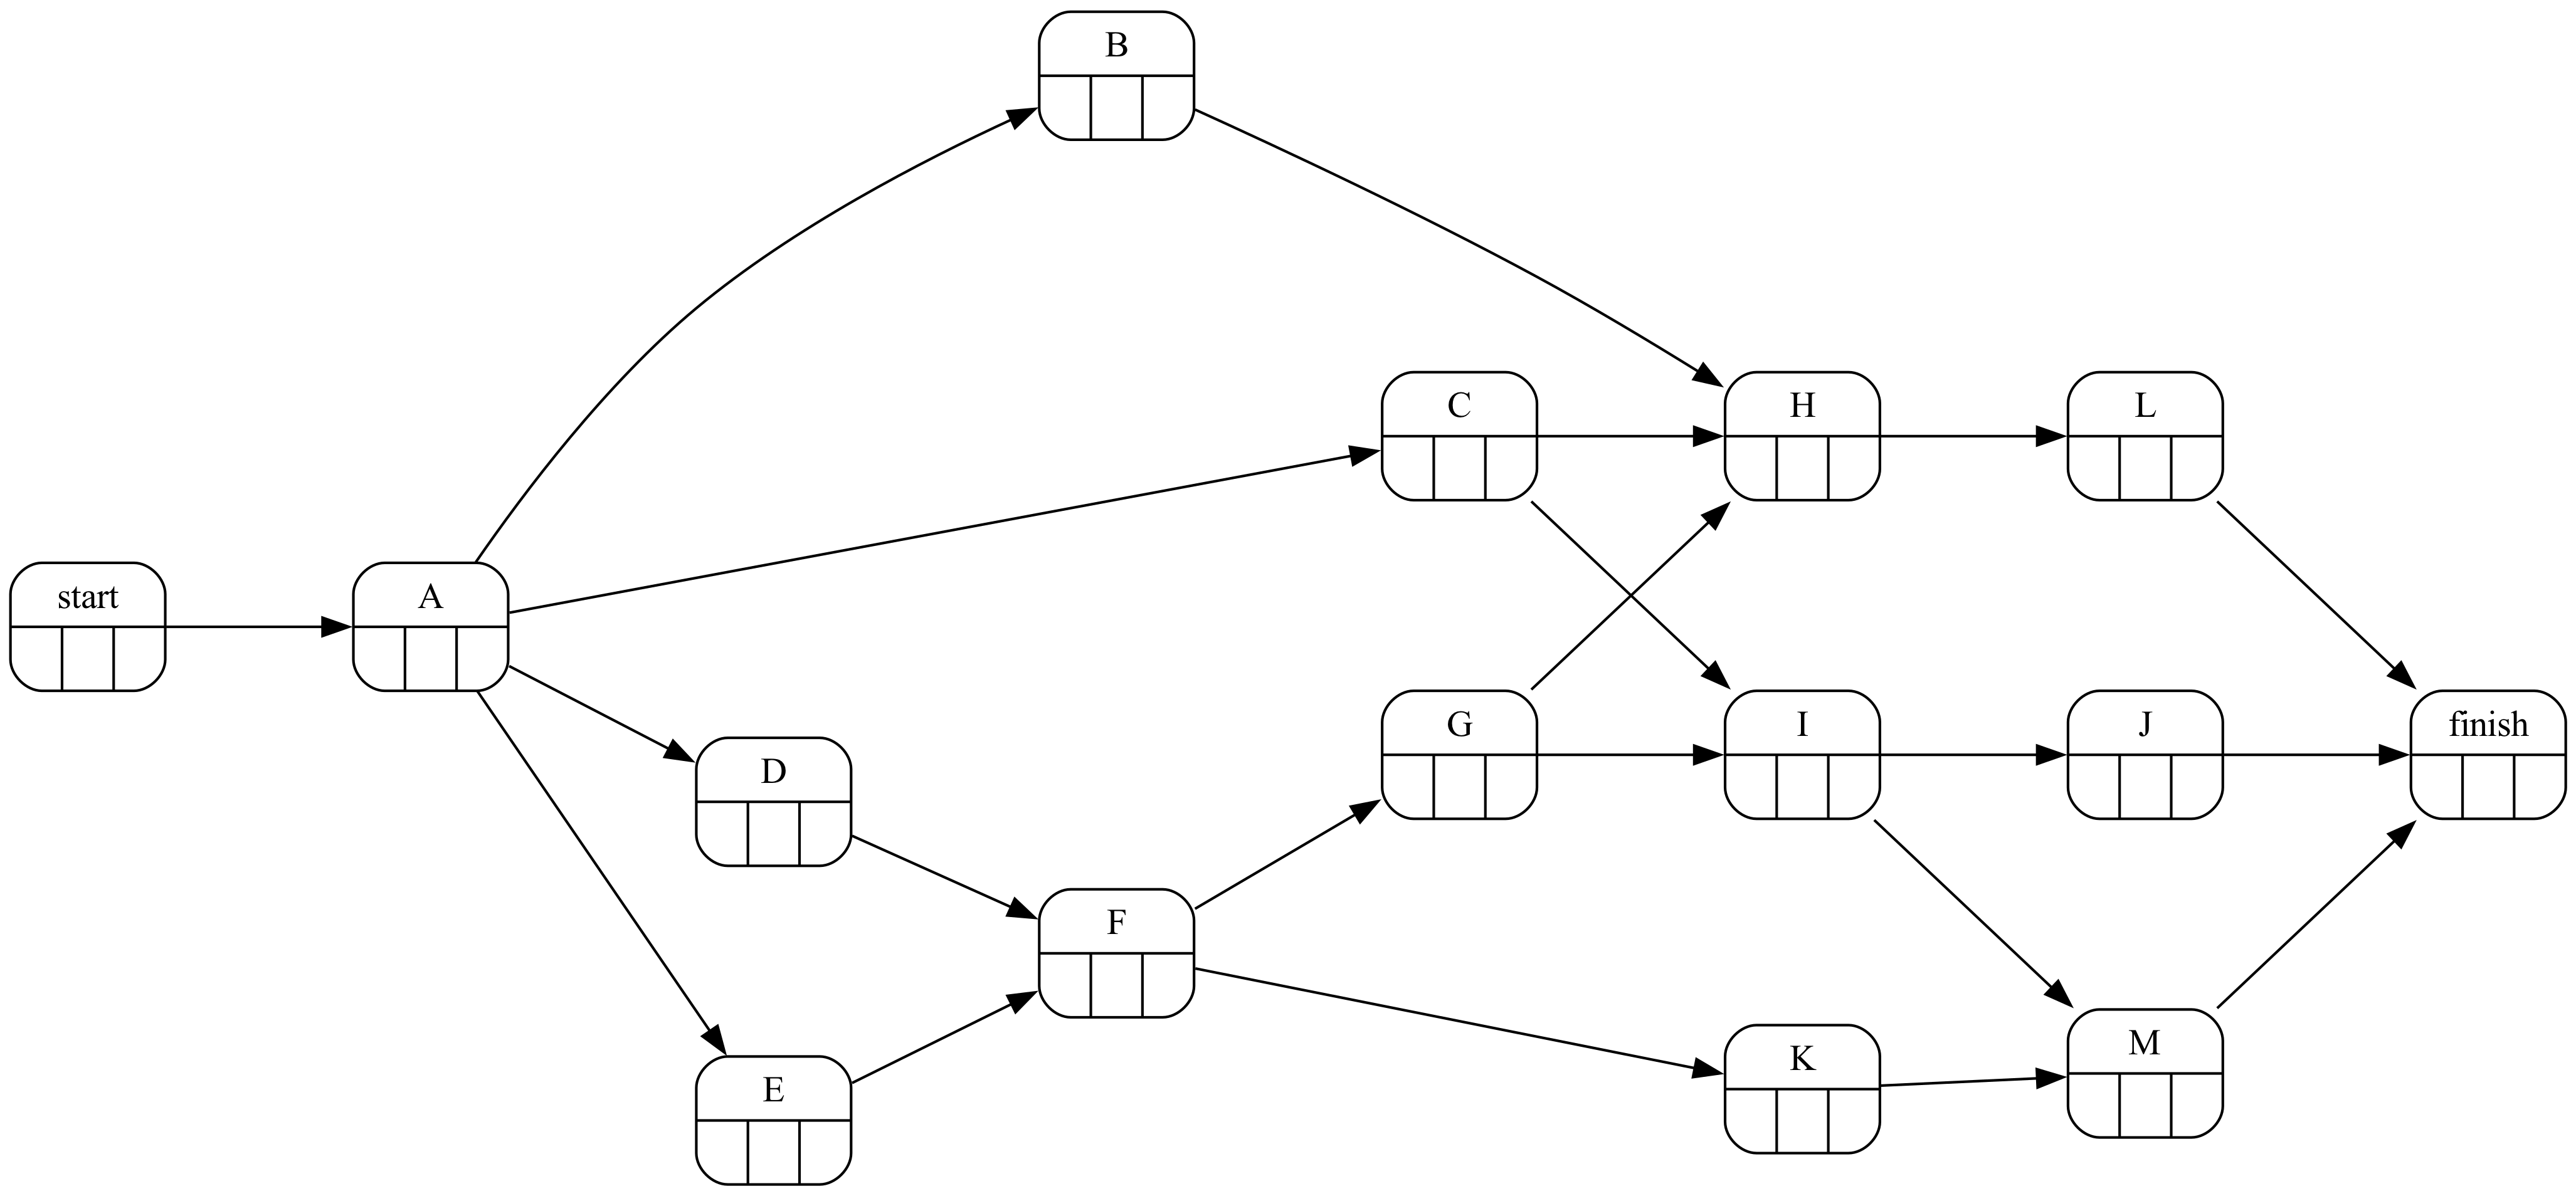

In [46]:
#| fig-cap: "Grafo Roy del proyecto"
#| label: fig-roy
proyecto.roy(ranksep=1, nodesep=1)

### Matriz de Zaderenko
A continuación podemos determinar la duración del proyecto calculando los tiempos tempranos y tardíos de su grafo Pert. Se hace en este caso mediante el algoritmo de Zaderenko:

In [47]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,10,11,early
1,,4.0,,,,,,,,,,0.0
2,,,0.0,3.0,,5.0,,4.0,,,,4.0
3,,,,4.0,,,,,,,,4.0
4,,,,,6.0,,,,,,,8.0
5,,,,,,4.0,,,4.0,,,14.0
6,,,,,,,5.0,0.0,,,,18.0
7,,,,,,,,,0.0,,4.0,23.0
8,,,,,,,,,,7.0,,18.0
9,,,,,,,,,,,4.0,23.0
10,,,,,,,,,,,8.0,25.0


Los tiempos tempranos y tardíos obtenidos para cada nodo son:

In [48]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,4,4
3,4,4
4,8,8
5,14,14
6,18,18
7,23,29
8,18,18
9,23,29
10,25,25


### Holgura total de las actividades
Conocidos los tiempos tempranos y tardíos se puede proceder a calcular la holgura total de las actividades.

In [49]:
#| tbl-cap: "Holgura total de las actividades"
#| label: tbl-holguras
resultados_pert['activities']

,H_total
@∇A⤑ΔD,0
@∇G⤑ΔH,0
@∇I⤑ΔM,6
A,0
B,10
C,9
D,0
E,1
F,0
G,0


#### Camino crítico
Las actividades con holgura total cero forman el camino crítico. Según el grafo Pert del proyecto, éste está compuesto por las siguientes rutas, cuyas actividades se listan en orden alfabético:

In [50]:
camino_critico = proyecto.critical_path(datos_proyecto['duration'])
proyecto.display_critical_path(datos_proyecto['duration'])

- Route_5 :	A, D, F, G, H, L <br> 

##### Grafo PERT con indicación de tiempos

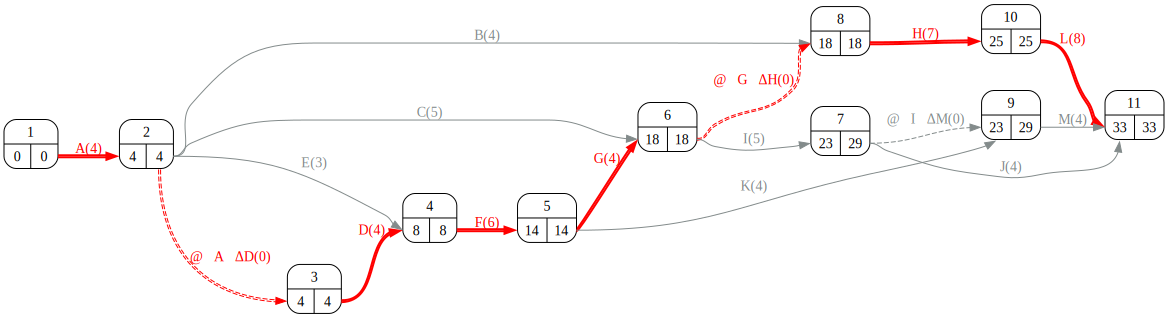

In [51]:
#| fig-cap: "Grafo Pert del proyecto con indicación del camino crítico"
#| label: fig-pertCritico
proyecto.pert(durations=datos_proyecto['duration'])

Alternativamente, se muestra el grafo Roy correspondiente con indicación del camino crítico.

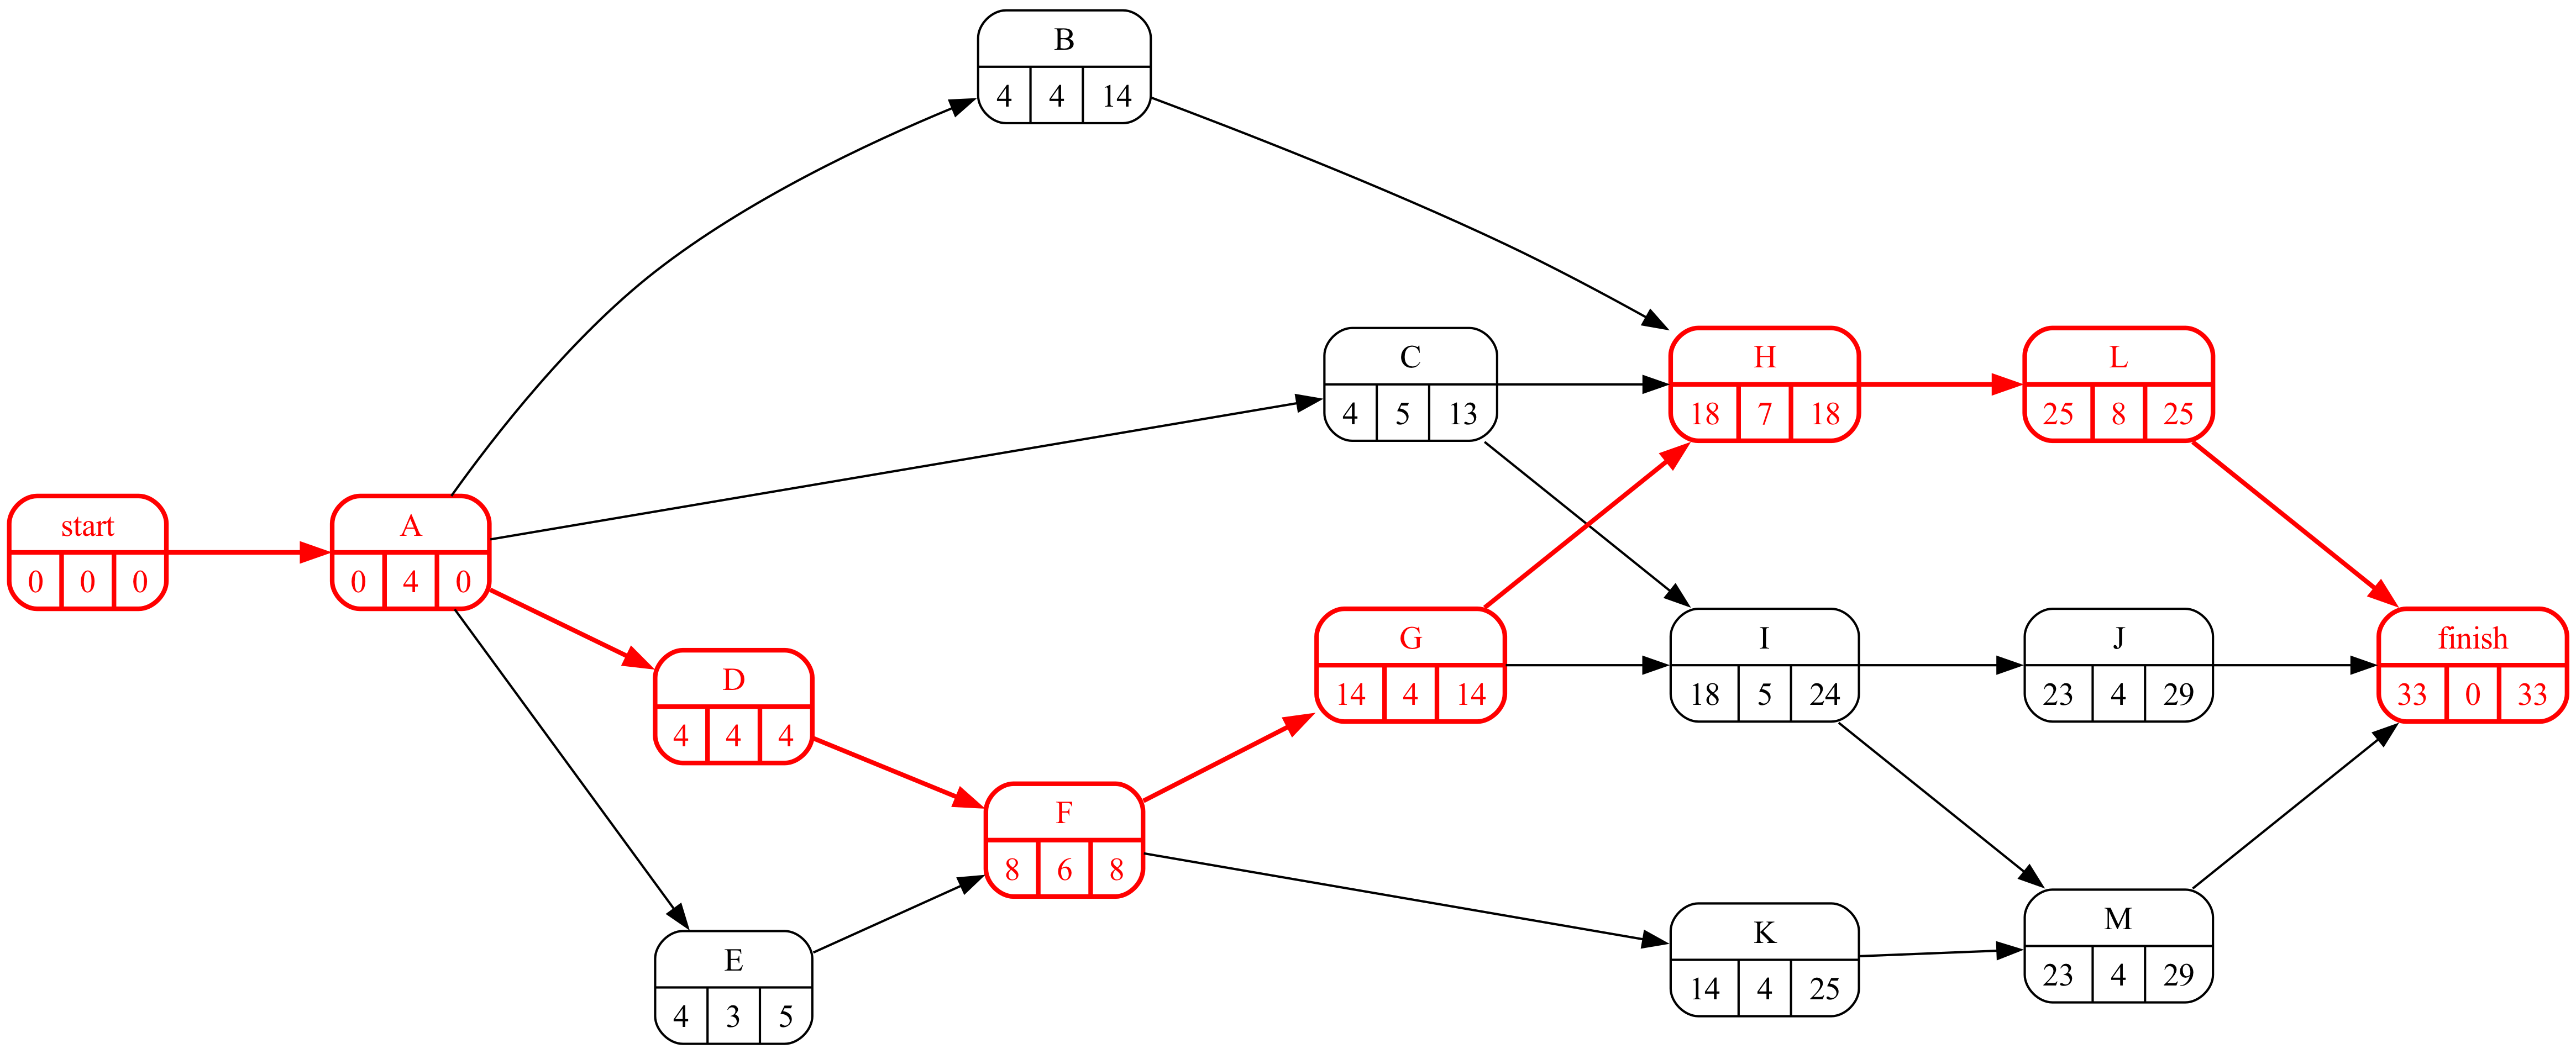

In [52]:
#| fig-cap: "Grafo Roy del proyecto con indicación del camino crítico"
#| label: fig-royCritico
proyecto.roy(durations=datos_proyecto['duration'], ranksep=1, nodesep=1)

### Calendario del proyecto
Se muestra a continuación el calendario del proyecto con indicación de las fechas de inicio y fin más tempranas y tardías de cada actividad:

In [53]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duration'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
activity,,,,,,
A,0,0,4,4,0,4
B,4,14,8,18,10,4
C,4,13,9,18,9,5
D,4,4,8,8,0,4
E,4,5,7,8,1,3
F,8,8,14,14,0,6
G,14,14,18,18,0,4
H,18,18,25,25,0,7
I,18,24,23,29,6,5


## Apartado 2

In [54]:
display(Markdown(pregunta_2))

2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  

#### Situación inicial
Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [55]:
proyecto_asignacion = proyecto.copy()
gantt_recursos, dibujo = proyecto_asignacion.gantt(datos_proyecto, 'duration', 'resources', total='fila', holguras = True, tikz=True,
                                                  params=dict(period_width=0.75))

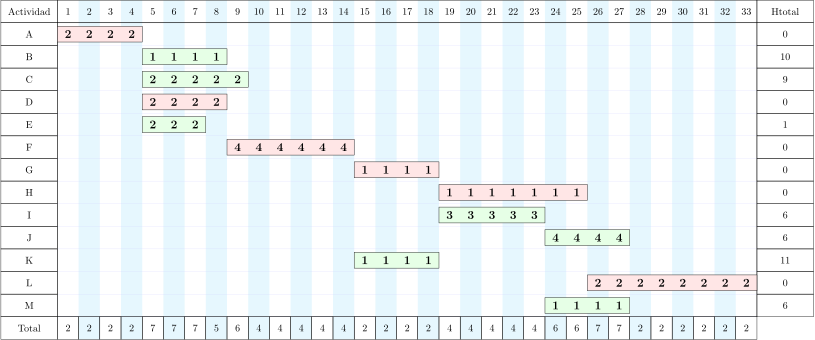

In [56]:
#| fig-cap: "Diagrama de Gantt del proyecto en su estado inicial"
#| label: fig-preAsignacionGantt
pinta_tikz(dibujo)

La fila "Total", representada gráficamente en la siguiente figura, proporciona la información del consumo previsto de recursos a lo largo del tiempo.

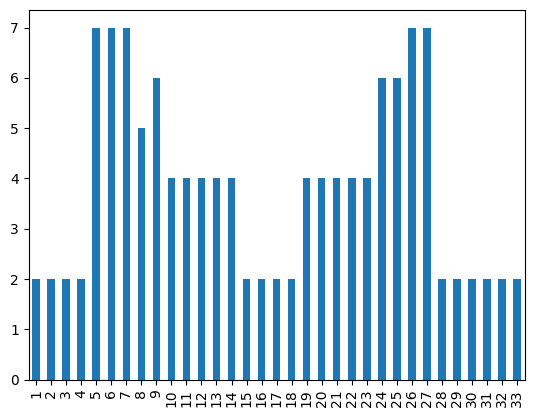

In [57]:
#| fig-cap: "Diagrama de cargas antes de aplicar el algoritmo de asignación"
#| label: fig-preAsignacionBarras

(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda de recursos actual infringe el límite impuesto durante los primeros 7 periodos. Es necesario aplicar el algoritmo de asignación.

#### Algoritmo de asignación
Se procede a aplicar el algoritmo de asignación sobre la planificación inicial del proyecto. El siguiente diagrama de Gantt muestra los desplazamientos realizados (área rayada al comienzo de las actividades).

In [58]:
duracion_y_recursos = datos_proyecto[['duration', 'resources']]
my_data, gantt_df, dibujo  = proyecto_asignacion.asignar(
                                    data=duracion_y_recursos,
                                    duration_label='duration',
                                    resource_label='resources',
                                    maximo=[3,3,3,3,3,3,3,100],
                                    report=False
                                    )

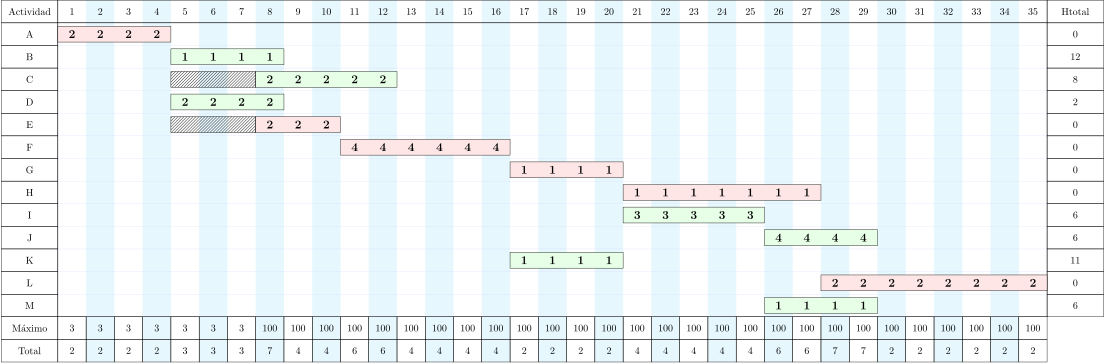

In [59]:
#| fig-cap: "Diagrama de Gantt del proyecto una vez aplicado el algoritmo de asignación"
#| label: fig-postAsignacion
pinta_tikz(dibujo)

Con las operaciones indicadas el proyecto sería compatible con la restricción en el límite de recursos disponibles impuesta en el enunciado del ejercicio.

## Apartado 3

In [60]:
display(Markdown(pregunta_3))

3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  

In [61]:
proyecto_ackoff = proyecto.copy()
ackoff, best_option, duration, available = proyecto_ackoff.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           reduction=5
                                                           )

In [62]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,M,0,1,2,3,4,5
Route_1,25.0,25.0,,,,,,20.0,,,,10.0,,23.0,23.0,22.0,21.0,20.0,19.0
Route_2,25.0,,20.0,,,,,20.0,,,,10.0,,24.0,24.0,23.0,22.0,21.0,20.0
Route_3,25.0,,20.0,,,,,,20.0,25.0,,,,18.0,18.0,18.0,18.0,18.0,18.0
Route_4,25.0,,20.0,,,,,,20.0,,,,25.0,18.0,18.0,18.0,18.0,18.0,18.0
Route_5,25.0,,,10.0,,30.0,25.0,20.0,,,,10.0,,33.0,32.0,31.0,30.0,29.0,28.0
Route_6,25.0,,,10.0,,30.0,25.0,,20.0,25.0,,,,27.0,26.0,26.0,26.0,26.0,26.0
Route_7,25.0,,,10.0,,30.0,25.0,,20.0,,,,25.0,27.0,26.0,26.0,26.0,26.0,26.0
Route_8,25.0,,,10.0,,30.0,,,,,25.0,,25.0,22.0,21.0,21.0,21.0,21.0,21.0
Route_9,25.0,,,,50.0,30.0,25.0,20.0,,,,10.0,,32.0,32.0,31.0,30.0,29.0,28.0
Route_10,25.0,,,,50.0,30.0,25.0,,20.0,25.0,,,,26.0,26.0,26.0,26.0,26.0,26.0


In [63]:
for iteracion, actividades in best_option.items():
    display(Markdown(f"- Iteración {iteracion}: " + ", ".join(actividades) + "<br>"))

- Iteración 0: D<br>

- Iteración 1: L<br>

- Iteración 2: L<br>

- Iteración 3: L<br>

- Iteración 4: H<br>

## Apartado 4

In [64]:
display(Markdown(pregunta_4))

4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  

Calculamos la duración del proyecto utilizando las duraciones tope y posteriormente alargaremos la duración de las tareas no críticas que han sido recortadas ineficientemente.

::: {style="max-width: 100%; overflow-x: auto;"}

In [65]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni para reducción a tiempo tope del proyecto"
#| label: tbl-ackoffƒTope
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           reduction=18,
                                                           report=False
                                                           )


ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,M,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Route_1,25.0,25.0,,,,,,20.0,,,,10.0,,23.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
Route_2,25.0,,20.0,,,,,20.0,,,,10.0,,24.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_3,25.0,,20.0,,,,,,20.0,25.0,,,,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_4,25.0,,20.0,,,,,,20.0,,,,25.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_5,25.0,,,10.0,,30.0,25.0,20.0,,,,10.0,,33.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_6,25.0,,,10.0,,30.0,25.0,,20.0,25.0,,,,27.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_7,25.0,,,10.0,,30.0,25.0,,20.0,,,,25.0,27.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_8,25.0,,,10.0,,30.0,,,,,25.0,,25.0,22.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,20.0,19.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,14.0
Route_9,25.0,,,,50.0,30.0,25.0,20.0,,,,10.0,,32.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_10,25.0,,,,50.0,30.0,25.0,,20.0,25.0,,,,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0


In [66]:
for iteracion, actividades in best_option.items():
    display(Markdown(f"- Iteración {iteracion}: " + ", ".join(actividades) + "<br>"))

- Iteración 0: D<br>

- Iteración 1: L<br>

- Iteración 2: L<br>

- Iteración 3: L<br>

- Iteración 4: H<br>

- Iteración 5: H<br>

- Iteración 6: H<br>

- Iteración 7: A<br>

- Iteración 8: A<br>

- Iteración 9: A<br>

- Iteración 10: G<br>

- Iteración 11: G<br>

- Iteración 12: G<br>

- Iteración 13: F<br>

- Iteración 14: F<br>

- Iteración 15: F<br>

- Iteración 16: E, D<br>

## Apartado 5

In [67]:
display(Markdown(pregunta_5))

5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución

La solución de este apartado precisa:  
   - Introducir una actividad ficticia (que llamaremos 💤L) tras el final de H y anterior a L con duración 2 periodos.  
   - Partir la actividad F en dos partes F1 y F2 e iniciar K tras el final de F1.  

El grafo PERT resultante de considerar estos cambios es el siguiente:

In [68]:
prelaciones_modificadas =  PredecessorTable.from_dict_of_sets(
    {
          'A': set(),
          'B': {'A'},
          'C': {'A'},
          'D': {'A'},
          'E': {'A'},
          'F1': {'D', 'E'},        # This is different. F1 represents the first part of F
          'F2': {'F1'},            # This is different. F2 represents the second part of F
          'G': {'F2'},             # This is different
          'H': {'B', 'C', 'G'},
          'I': {'C', 'G'},
          'J': {'I'},
          'K': {'F1'},           # This is different
          '💤L': {'H'},         # This is different. zzzL represent the waiting period before L can start.
          'L': {'💤L'},
          'M': {'I', 'K'}
    }
)

In [69]:
proyecto_modificado = prelaciones_modificadas.create_project()
#proyecto_modificado.pert()

In [70]:
duracion_modificado = datos_proyecto['duration'].drop('F')
duracion_modificado['F1'] = 3
duracion_modificado['F2'] = 3
duracion_modificado['💤L'] = 2

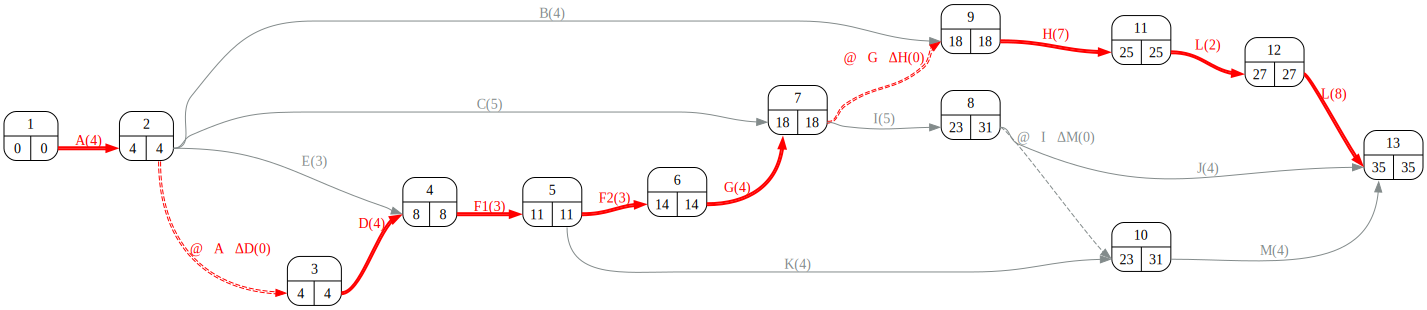

In [71]:
#| fig-cap: "Grafo Pert del proyecto modificado con indicación del camino crítico"
#| label: fig-pertcriticoModificado
proyecto_modificado.pert(durations=duracion_modificado, ranksep=0.5)

In [72]:
gantt_df, dibujo = proyecto_modificado.gantt(duracion_modificado.to_frame(),
                                             duration_label='duration',
                                             tikz=True,
                                             params=dict(
                                                 period_width=0.75,
                                             )
                                        )

Esta nueva planificación puede ser también representada en el siguiente diagrama de Gantt, donde la zona rayada representa la espera de dos periodos (💤L).

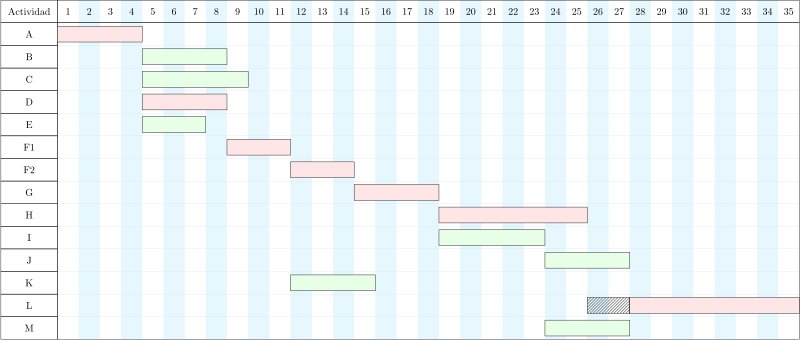

In [73]:
#| fig-cap: "Diagrama de Gantt del proyecto modificado"
#| label: fig-GanttModificado
pinta_tikz(dibujo)

In [74]:
duracion_proyecto_modificado = proyecto_modificado.duration(durations=duracion_modificado.to_frame()['duration'])
Markdown(f"La duración del proyecto tras estos cambios es {duracion_proyecto_modificado} periodos.")

La duración del proyecto tras estos cambios es 35 periodos.